**Setup Environment**

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Load Pre-trained Model**

In [2]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

**Create and Compile Model**

In [3]:
# Create a new model and add the base model and new layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to the number of classes you have
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Create Placeholder Images**

In [4]:
# Create directories if they don't exist
os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

# Create 10 sample images for each class
for i in range(10):
    # Create a blank white image for class_a
    img = Image.fromarray(np.ones((224, 224, 3), dtype=np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    # Create a blank black image for class_b
    img = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")

Sample images created in 'sample_data/'


**Train Model**

In [5]:
# Load and preprocess the dataset
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Verify if the generator has loaded images correctly
print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

# Train the model
if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
1/1 [==============================] - 14s 14s/step - loss: 0.7259 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 291ms/step - loss: 4.7951 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 331ms/step - loss: 1.7112 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 307ms/step - loss: 0.8339 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 280ms/step - loss: 1.1963 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 321ms/step - loss: 1.1922 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 311ms/step - loss: 1.0759 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 301ms/step - loss: 0.9045 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 290ms/step - loss: 0.7254 - accuracy: 0.5000
Epoch 10/10
1/1 [======================

**Fine-Tune Model**

In [6]:
# Unfreeze the top layers of the base model 
for layer in base_model.layers[-4:]:
    layer.trainable = True 

# Compile the model again 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

# Train the model again 
model.fit(train_generator, epochs=10) 

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.5213 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 331ms/step - loss: 3.5598 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 431ms/step - loss: 4.1756 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 350ms/step - loss: 0.8370 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 337ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 401ms/step - loss: 0.6847 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 367ms/step - loss: 0.7071 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 341ms/step - loss: 0.7265 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 371ms/step - loss: 0.6596 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 361ms/step - loss: 0.6243 - accuracy: 0.5000


**Visualize Training and Validation Loss**

Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10
1/1 [==============================] - 12s 12s/step - loss: 0.5343 - accuracy: 1.0000 - val_loss: 0.4978 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 410ms/step - loss: 0.4978 - accuracy: 0.5000 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 380ms/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.5571 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 401ms/step - loss: 0.5572 - accuracy: 0.5000 - val_loss: 0.2281 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 391ms/step - loss: 0.2281 - accuracy: 1.0000 - val_loss: 0.3693 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 391ms/step - loss: 0.3693 - accuracy: 1.0000 - val_loss: 0.1328 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 384ms/step - loss: 0.1328 - a

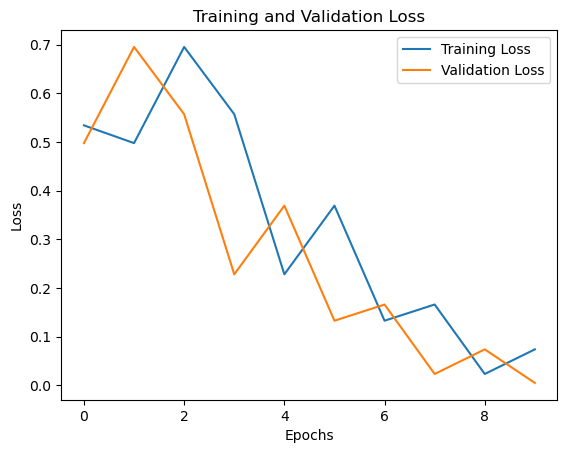

In [7]:
# Modify data generator to include validation data
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Train the model with validation data
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Experiment with Different Optimizers**

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 380ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 371ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 391ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 381ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 390ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 397ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=======

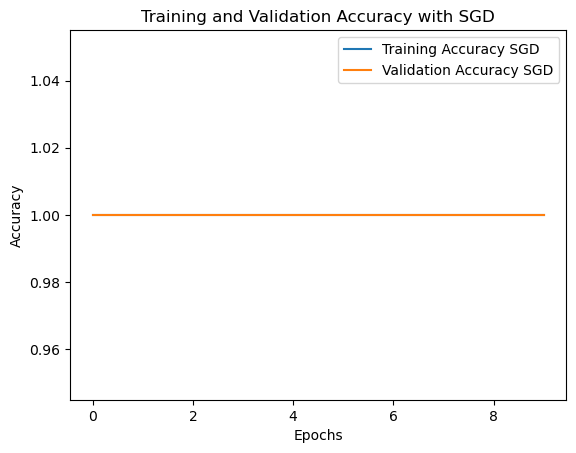

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 83.6160 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 407ms/step - loss: 83.6129 - accuracy: 0.5000 - val_loss: 1.0065 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 389ms/step - loss: 1.0065 - accuracy: 0.5000 - val_loss: 6.8959 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 410ms/step - loss: 6.8962 - accuracy: 0.5000 - val_loss: 0.6530 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 411ms/step - loss: 0.6530 - accuracy: 0.5000 - val_loss: 5.9831 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 409ms/step - loss: 5.9827 - accuracy: 0.5000 - val_loss: 0.7597 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 401ms/step - loss: 0.7597 - accuracy: 0.5000 - val_loss: 0.3439 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=====

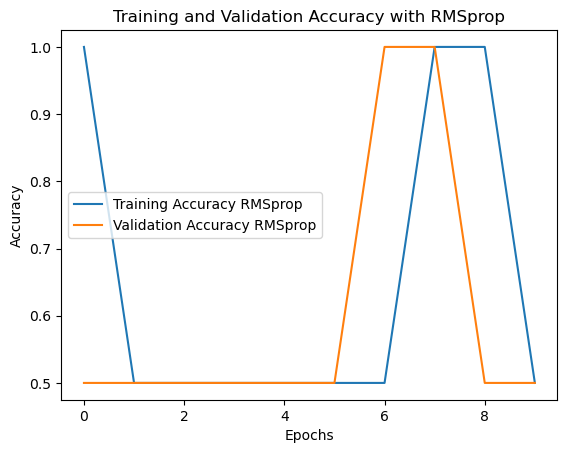

In [8]:
# Function to reset the model weights
def reset_model(model):
    # Clone the model to reset weights
    model_clone = clone_model(model)
    model_clone.set_weights(model.get_weights())
    return model_clone

# Prepare to reset the model for each optimizer test
initial_model = reset_model(model)  # Assume 'model' is the initial compiled model

# Experiment with SGD optimizer
sgd_model = reset_model(initial_model)  # Reset model
sgd_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = sgd_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for SGD
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy SGD')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy SGD')
plt.title('Training and Validation Accuracy with SGD')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Experiment with RMSprop optimizer
rmsprop_model = reset_model(initial_model)  # Reset model
rmsprop_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = rmsprop_model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy for RMSprop
plt.plot(history_rmsprop.history['accuracy'], label='Training Accuracy RMSprop')
plt.plot(history_rmsprop.history['val_accuracy'], label='Validation Accuracy RMSprop')
plt.title('Training and Validation Accuracy with RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Evaluate Model on a Test Set**

In [9]:
# Load and preprocess the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Evaluate the fine-tuned model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Found 20 images belonging to 2 classes.
1/1 [==============================] - 0s 321ms/step - loss: 0.0050 - accuracy: 1.0000
Test Accuracy: 100.00%
Test Loss: 0.0050
